# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [174]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 649


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [175]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vohipaho
City not found. Skipping...
Processing Record 2 of Set 1 | mawu
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | christchurch
Processing Record 6 of Set 1 | poiares
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | mana
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | holyhead
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | piacabucu
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | chibougamau
Processing Record 19 of Set 1 | el galpon
Processing Record 20 of Set 1 | mili
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1

In [176]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          618
Lat           618
Lng           618
Max Temp      618
Humidity      618
Cloudiness    618
Wind Speed    618
Country       618
Date          618
dtype: int64

In [177]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mawu,29.5923,107.3139,19.47,71,32,0.96,CN,1697418189
1,ribeira grande,38.5167,-28.7000,21.54,91,61,8.94,PT,1697418189
2,grytviken,-54.2811,-36.5092,0.34,88,100,4.70,GS,1697418190
3,christchurch,-43.5333,172.6333,18.30,40,20,5.14,NZ,1697417544
4,poiares,40.2103,-8.2575,19.51,94,100,1.61,PT,1697418190


In [178]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [179]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mawu,29.5923,107.3139,19.47,71,32,0.96,CN,1697418189
1,ribeira grande,38.5167,-28.7000,21.54,91,61,8.94,PT,1697418189
2,grytviken,-54.2811,-36.5092,0.34,88,100,4.70,GS,1697418190
3,christchurch,-43.5333,172.6333,18.30,40,20,5.14,NZ,1697417544
4,poiares,40.2103,-8.2575,19.51,94,100,1.61,PT,1697418190


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

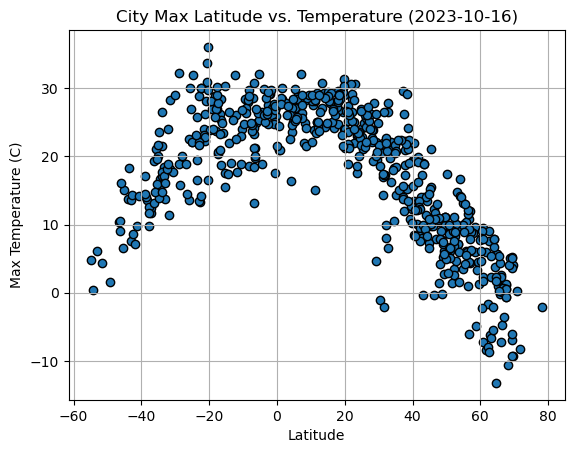

In [180]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties with a dynamic unix conversion to specify the date
plt.title(f"City Max Latitude vs. Temperature ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

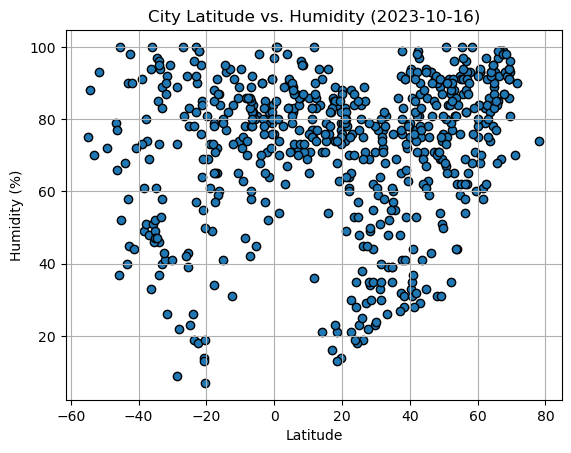

In [181]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties with a dynamic unix conversion to specify the date
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

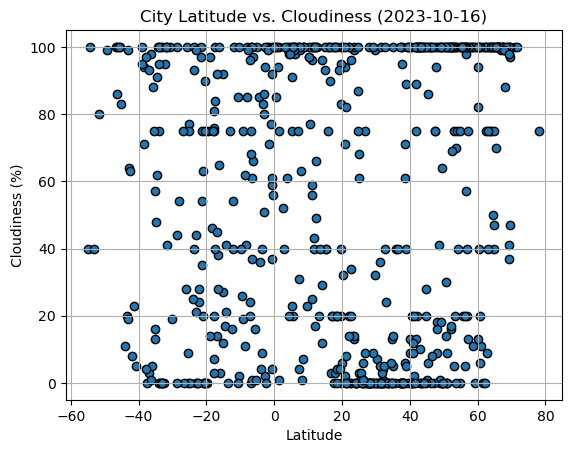

In [182]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties with a dynamic unix conversion to specify the date
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

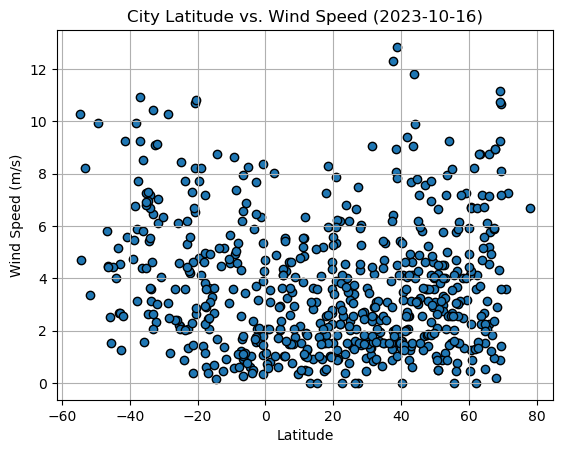

In [183]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties with a dynamic unix conversion to specify the date
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [184]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mawu,29.5923,107.3139,19.47,71,32,0.96,CN,1697418189
1,ribeira grande,38.5167,-28.7000,21.54,91,61,8.94,PT,1697418189
4,poiares,40.2103,-8.2575,19.51,94,100,1.61,PT,1697418190
5,thompson,55.7435,-97.8558,6.09,87,20,0.00,CA,1697417774
6,whitehorse,60.7161,-135.0538,9.43,68,20,6.71,CA,1697418191


In [185]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,0.34,88,100,4.70,GS,1697418190
3,christchurch,-43.5333,172.6333,18.30,40,20,5.14,NZ,1697417544
8,port-aux-francais,-49.3500,70.2167,1.59,72,99,9.92,TF,1697418192
10,adamstown,-25.0660,-130.1015,22.15,78,77,2.19,PN,1697418192
13,piacabucu,-10.4056,-36.4344,23.99,74,2,4.58,BR,1697418194


In [186]:
# Define a function to create Linear Regression plots
def linear_regression(df, x_values, y_values, x_label, y_label):
    x = df[x_values]
    y = df[y_values]

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
    regress = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))

    plt.scatter(x, y)
    plt.plot(x, regress, "r-")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, (min(x), max(y)-1), fontsize=15, color="red")
    print(f"The r-value is: {rvalue ** 2}")
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7682801376774139


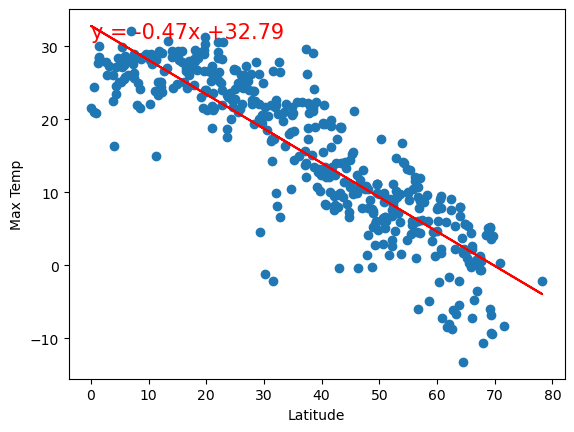

In [187]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")

The r-value is: 0.4989747112863876


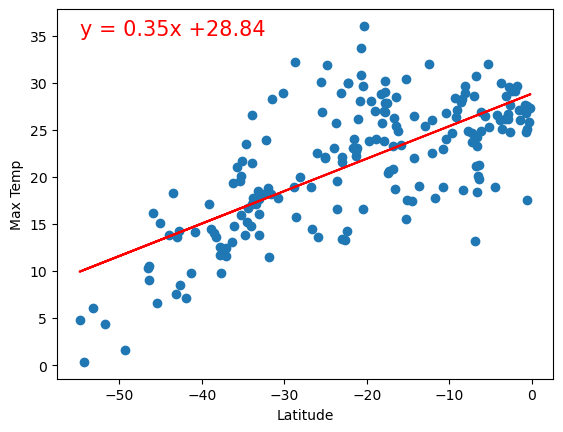

In [188]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** These plots show that, in general, latitude has a strong correlation with the maximum temperature of the area. The northern hemisphere has a stronger correlation to a lower maximum temperature as the latitude increases. While the southern hemisphere correlation isn't as strong, the correlation still shows that as the latitude becomes more negative, the maximum temperature in the area decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03306623688782358


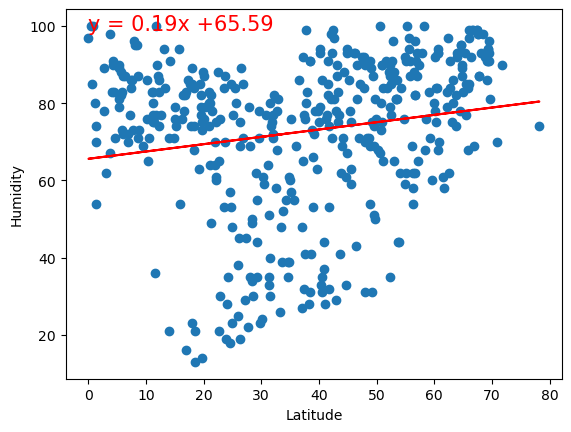

In [189]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity")

The r-value is: 0.024702321154541636


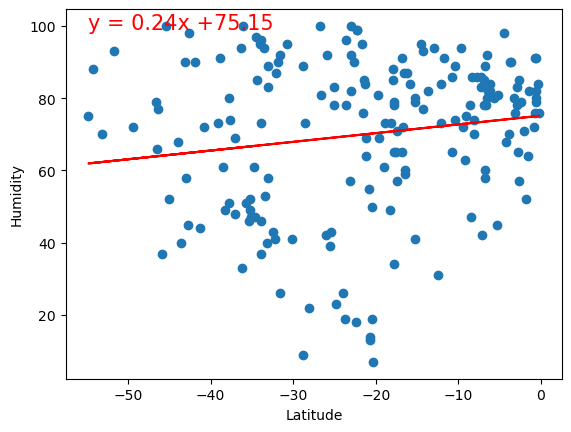

In [190]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** The results here show that latitude is a poor predictor of the humidity in either the Northern or Southern Hemisphere, with both r-values very close to 0. The intercept shows that the humidity is generally over 65% in both hemispheres, with the Southern Hemisphere having a higher humidity with an intercept at 75%

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.017754045759847854


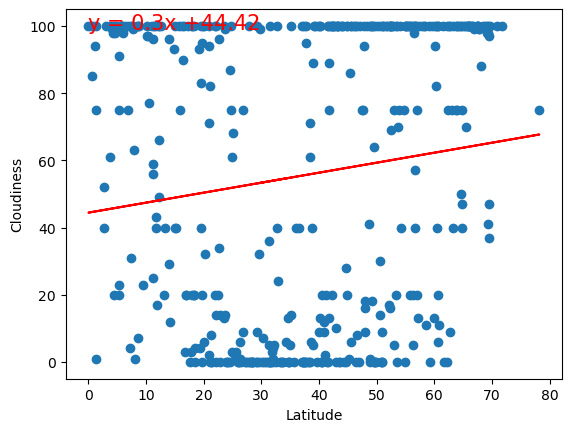

In [191]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness")

The r-value is: 0.00022148866143458182


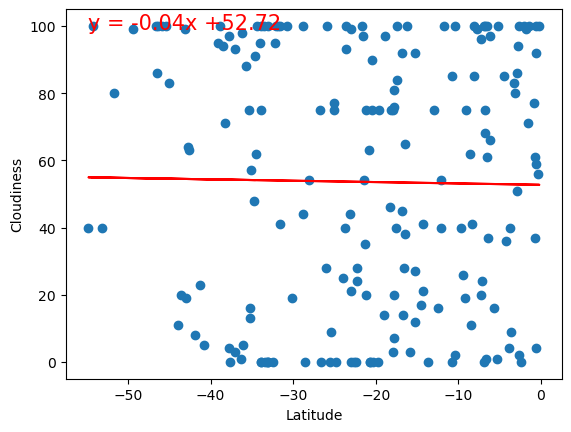

In [192]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** The correlation between latitude and cloudiness in the area is very low in both hemispheres. In the Southern Hemisphere's case, the correlation is borderline non-existant. Additionally, the scatter plot shows a lot of the overall cloudiness in both hemispheres is an all or nothing type proposition, with the results clustering at the top and bottom of the plots, resulting in an intercept that does not hit many of the plot points.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.059388127182865735


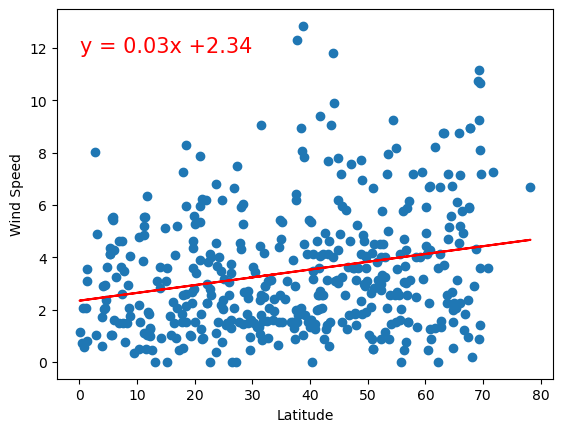

In [193]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed")

The r-value is: 0.10263137313383233


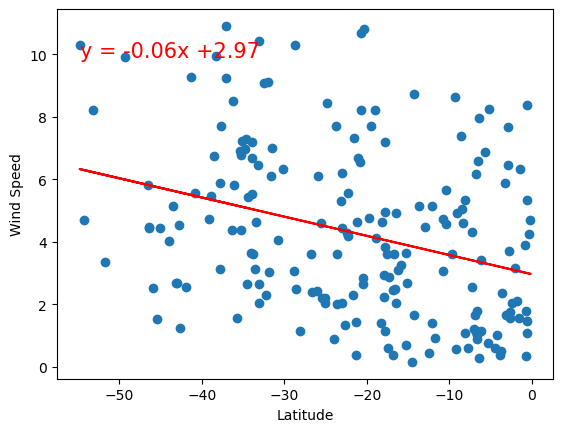

In [194]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** The correlation between latitude and wind speed is very low in both hemispheres. Both hemispheres have wide ranges to their results, but both plots have low intercepts that start between 2 and 3 m/s.